<a href="https://colab.research.google.com/github/kaljuvee/datascience/blob/master/notebooks/stats/regression_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import statsmodels.api as sm
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
import pandas as pd

**Background**

The simplest case of feature selection is the case where there are numerical input variables and a numerical target for regression predictive modeling, and this can often be done with statistical methods **correlation** and **mutual information**.


**Overview**

We demonstrate the following classical feature selection methods:

* **Correlation and mutual information statistics** - evaluate the importance of numerical input data using the correlation 
and mutual information statistics.
* **Numerical feature selection** - perform feature selection for numerical input data when fitting and evaluating a regression model
* **Tuning with grid search** -  tune the number of features selected in a modeling pipeline using a grid search

**Model Pipeline**

1. Load and Convert Regression Dataset
2. Numerical Feature Selection
  1. Correlation Feature Selection
  2. Mutual Information Feature Selection
3. Modeling With Selected Features
  1. Model Built Using All Features
  2. Model Built Using Correlation Features Subset
  3. Model Built Using All Mutual Information Features
4. Tune the Number of Selected Features - TODO

**References**

* [Regression Feature Selection](https://machinelearningmastery.com/feature-selection-for-regression-data/)
* [scikit-learn](https://scikit-learn.org/)


**1. Load and Normalise Data Sets**

In [7]:
revenue_df = pd.read_csv('data/total_revenues_smartphone_sales_datetime.csv')
output_scaler = MinMaxScaler()
revenue_df['total_revenues'] = output_scaler.fit_transform(np.array(revenue_df['total_revenues']).reshape(-1, 1))
revenue_df.shape
# we expect 30 columns, excluding output variable and time index, and 37 quarterly data points

C:\Users\kalju\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(37, 31)

In [8]:
revenue_df.head()

,Month,total_revenues,Alcatel,Apple,Asus,BlackBerry,Coolpad,Fujitsu,Gionee,HMD,...,Panasonic,Pantech,Samsung,Sharp,Sony,Tecno,Vivo,Wiko,Xiaomi,ZTE
0,Mar-11,0.000000,0.02,18.6,0.20,13.8,1.60,1.4,0.7,0.0,...,0.05,0.43,12.5993,1.1,4.0,0.0,0.0,0.0,0.00,1.4
1,Jun-11,0.023668,0.14,20.3,0.25,12.6,1.80,1.5,1.0,0.0,...,0.05,0.60,20.1985,1.0,4.4,0.0,0.0,0.0,0.00,2.5
2,Sep-11,0.070400,0.35,17.1,0.25,11.7,2.15,1.2,1.3,0.0,...,0.10,0.85,28.1015,1.2,6.2,0.0,0.0,0.0,0.08,3.6
3,Dec-11,0.065626,0.55,37.0,0.25,13.4,3.20,1.6,1.7,0.0,...,0.15,1.22,36.5000,1.2,6.4,0.0,0.0,0.0,0.40,5.4
4,Mar-12,0.078637,0.70,35.1,0.30,9.9,3.80,2.6,1.8,0.0,...,0.20,1.30,44.4000,1.3,5.8,0.0,0.0,0.0,1.20,4.5


In [4]:
y_df = revenue_df['total_revenues']
y_df.head()

0    0.000000
1    0.023668
2    0.070400
3    0.065626
4    0.078637
Name: total_revenues, dtype: float64

In [5]:
# Select regressors all columns but total revenues
X_df = revenue_df.loc[:, revenue_df.columns != 'total_revenues']
X_df.head()

,Month,Alcatel,Apple,Asus,BlackBerry,Coolpad,Fujitsu,Gionee,HMD,HTC,...,Panasonic,Pantech,Samsung,Sharp,Sony,Tecno,Vivo,Wiko,Xiaomi,ZTE
0,Mar-11,0.02,18.6,0.20,13.8,1.60,1.4,0.7,0.0,9.60,...,0.05,0.43,12.5993,1.1,4.0,0.0,0.0,0.0,0.00,1.4
1,Jun-11,0.14,20.3,0.25,12.6,1.80,1.5,1.0,0.0,11.85,...,0.05,0.60,20.1985,1.0,4.4,0.0,0.0,0.0,0.00,2.5
2,Sep-11,0.35,17.1,0.25,11.7,2.15,1.2,1.3,0.0,13.15,...,0.10,0.85,28.1015,1.2,6.2,0.0,0.0,0.0,0.08,3.6
3,Dec-11,0.55,37.0,0.25,13.4,3.20,1.6,1.7,0.0,10.20,...,0.15,1.22,36.5000,1.2,6.4,0.0,0.0,0.0,0.40,5.4
4,Mar-12,0.70,35.1,0.30,9.9,3.80,2.6,1.8,0.0,6.70,...,0.20,1.30,44.4000,1.3,5.8,0.0,0.0,0.0,1.20,4.5


In [9]:
# we are not running time series regression so exclude date index
X_df.drop('Month', axis=1, inplace=True)

In [10]:
from sklearn.model_selection import train_test_split
# split into train and test sets with 80 percent of the data for training and 20 percent for testing.
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (29, 29) (29,)
Test (8, 29) (8,)


**2. Numerical Feature Selection**

**2.1 Numerical Feature Selection - Correlation**

Feature 0: 4.629553
Feature 1: 19.392903
Feature 2: 24.631010
Feature 3: 66.997125
Feature 4: 4.814192
Feature 5: 39.063048
Feature 6: 0.012950
Feature 7: 21.346836
Feature 8: 99.770387
Feature 9: 99.585641
Feature 10: 32.951346
Feature 11: 3.092807
Feature 12: 4.346473
Feature 13: 15.555962
Feature 14: 1.114579
Feature 15: 30.315032
Feature 16: 46.791570
Feature 17: 82.701354
Feature 18: 71.218707
Feature 19: 4.129725
Feature 20: 40.862592
Feature 21: 13.722245
Feature 22: 0.658072
Feature 23: 10.360216
Feature 24: 114.705461
Feature 25: 80.100628
Feature 26: 17.486004
Feature 27: 89.883846
Feature 28: 0.276683


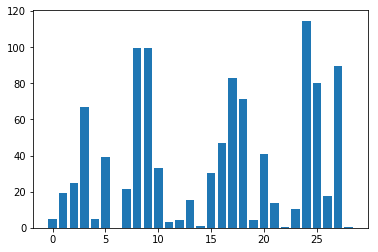

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# wrap feature selection logic in a function - use ALL features
def select_features_corr(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection using correlation, by default
X_train_fs, X_test_fs, fs = select_features_corr(X_train, y_train, X_test)

# what are scores for the features (ranging from less than 1 to 101)
def show_scores():
  for i in range(len(fs.scores_)):
	  print('Feature %d: %f' % (i, fs.scores_[i]))
  # plot the scores
  pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
  pyplot.show()

show_scores()

**Observation:**

* Huawei (9) and Samsung (24) show high scores
* Label the x axis or create a mapping dictionary

**2.2 Numerical Feature Selection - Mutual Information**

In [14]:
from sklearn.feature_selection import mutual_info_regression
# configure to select all features
# feature selection
def select_features_mutualinfo(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection using correlation
X_train_fs, X_test_fs, fs = select_features_mutualinfo(X_train, y_train, X_test)

show_scores()

NameError: name 'SelectKBest' is not defined

**Observation:**

* Huawei (9) still scores high as important feature

**3. Modeling with Features**

**3.1 Using All Features**

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.653


**Observation:**

* Using all features we get Mean Absolute Error (MAE) of 0.653

**3.2. Model with Subset Correlation Features**

**Objective:**

* Use a subset or combination of features that achieves MAE < 0.653

In [18]:

# feature selection
def select_features_10_corr(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=5)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection by correlation
X_train_fs, X_test_fs, fs = select_features_10_corr(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.089


**Observation:**

* Using 10 top features we get Mean Absolute Error (MAE) of 0.132 improving predictability

**Resources**

* [Rergression Features Selection](https://machinelearningmastery.com/feature-selection-for-regression-data/) by Jason Brownlee